### Pattern Recognition
### Assignment 4  
### COE19B007 - Praveen B R
#### Question 6
**Q6.)
 Fisherfaces- Face classification using LDA (40 classes)**
- Use the following face image files (face-ds.zip) to classify the faces of 40 different people.
- Use LDA to reduce the dimensions from d to d’.
- Use appropriate classifier taught in class (any classification algorithm taught in class like Bayes classifier,minimum distance classifier, and so on )
- Compare the performance of LDA and PCA using appropriate performance measures.


In [29]:
import cv2
import os
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [30]:
loc = "./data/face/"

In [31]:
fvs = {}
data = []
label = []
for img in os.listdir(loc):
    face_class = int(re.search("_.*\.",str(img)).group()[1:-1])
    fv = cv2.imread(loc+img,0)
    fv = fv.reshape(70*80,)
    if face_class-1 not in fvs.keys(): fvs[face_class-1] =[]
    fvs[face_class-1].append(fv)
    data.append(np.array(fv))
    label.append(face_class)

In [32]:
data = pd.DataFrame(np.array(data))

In [33]:
data

,0,1,2,3,4,5,6,7,8,9,...,5590,5591,5592,5593,5594,5595,5596,5597,5598,5599
0,90,109,100,102,103,105,104,103,102,102,...,36,22,45,66,51,57,60,65,75,65
1,89,110,103,102,101,103,102,102,104,103,...,33,40,56,70,66,69,69,70,75,62
2,36,43,37,41,37,39,40,40,40,37,...,37,36,36,38,32,30,33,38,47,36
3,46,53,49,49,52,52,55,54,55,50,...,49,50,48,46,48,50,54,55,59,46
4,18,25,21,22,24,21,23,23,24,21,...,81,96,107,124,136,147,157,153,165,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,27,36,33,33,33,26,28,31,33,31,...,111,104,119,165,152,172,176,183,93,12
396,79,101,94,94,94,94,92,94,93,102,...,53,52,42,40,41,25,19,30,40,42
397,114,138,131,131,131,132,130,132,134,135,...,183,136,127,117,110,104,96,92,100,82
398,38,46,39,43,45,45,47,44,46,43,...,78,63,56,72,70,80,91,85,71,37


In [34]:
len(data),len(data[0]), data.shape

(400, 400, (400, 5600))

In [35]:
print(data.iloc[1].min())
print(data.iloc[1].max())

14
210


In [36]:
(fv,fv.shape,fv.size)

(array([28, 32, 31, ..., 43, 50, 42], dtype=uint8), (5600,), 5600)

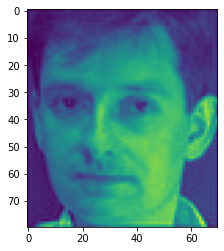

In [37]:
plt.imshow(fv.reshape(80,70))
plt.show()

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
data_reduced = lda.fit_transform(data,label)

### Data reduced to 39 dimensions

In [42]:
pd.DataFrame(data_reduced)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,2.142342,-7.142238,-2.599453,-1.806907,-6.819361,-0.223743,4.657993,-1.806695,-2.797405,-4.242768,...,-1.416347,2.519853,0.017361,-0.607453,0.395723,0.485859,-6.371077,0.046055,-2.399498,1.696271
1,-8.598490,-0.297351,1.267740,-4.097125,-2.293379,-0.173609,1.010959,-2.129533,-0.546367,0.898010,...,-1.294855,-2.370167,-0.628503,-1.531981,1.483412,-1.932549,-3.088798,-0.390661,-0.426051,-2.047970
2,0.951513,1.342512,9.066498,2.260186,-4.097464,4.821012,2.422209,3.140420,-0.716504,-1.820219,...,1.881041,-0.976110,-0.390534,-0.066738,-0.267487,-0.338311,-0.443523,0.374987,-0.248209,0.434597
3,-0.320519,4.848531,8.384886,-1.079507,-0.958080,-5.952865,-0.977649,-1.083709,3.862338,2.518196,...,0.270839,0.335793,-2.659327,-0.463352,-0.338383,1.144958,-1.223079,0.598333,1.292530,-0.302664
4,15.692993,10.184065,-3.866333,-9.411214,3.195964,1.775087,1.554318,0.523627,2.477540,1.226740,...,-1.826947,-0.783264,-2.382971,-1.643276,0.828683,0.157062,0.022832,-0.754107,1.779117,-1.827469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,7.270894,4.892683,12.051559,1.554904,-0.752417,-1.982970,-3.810484,2.257428,0.572296,2.493132,...,2.187109,0.114519,-0.164166,-1.208235,-0.361393,0.187030,-1.374803,-2.087204,1.920048,0.418946
396,-8.737988,1.238492,-8.426483,-1.873248,-0.835277,2.940027,-0.281766,-1.994831,0.385237,3.921271,...,0.814728,3.153173,-1.962218,-0.885239,-3.227719,1.844784,1.066356,0.626348,1.426620,1.618408
397,-1.153246,-10.488794,5.549685,-6.960379,2.289408,0.402141,2.829716,-5.101371,4.108234,3.886906,...,2.887922,0.273273,-1.065048,-0.702608,-0.871905,-2.046377,-1.693549,0.090465,-0.420537,0.515776
398,-3.202239,4.471222,-8.919166,2.047572,-2.460588,0.572015,-1.508491,-2.770074,-0.944837,0.353939,...,0.248751,-5.409094,-0.517225,1.098572,0.411385,2.761511,0.657484,0.037807,1.012798,-1.217967


In [15]:
class NaiveBayesClassifier():
    '''
    Bayes Theorem form
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def calc_prior(self, features, target):
        '''
        prior probability P(y)
        calculate prior probabilities
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed)
        we will assume that probability of specific target value given specific class is normally distributed 
        
        probability density function derived from wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
#         numerator = np.exp(-((x-mean)**2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(30,15))
        sns.set_style("whitegrid")
        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        fig.suptitle('True vs Predicted Comparison', fontsize=20)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        
        plt.show()

In [16]:
y = pd.DataFrame(label)
y

,0
0,23
1,18
2,36
3,16
4,34
...,...
395,24
396,26
397,6
398,28


In [53]:
df = pd.DataFrame(data_reduced)
df["label"] = y
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,label
0,2.142342,-7.142238,-2.599453,-1.806907,-6.819361,-0.223743,4.657993,-1.806695,-2.797405,-4.242768,...,2.519853,0.017361,-0.607453,0.395723,0.485859,-6.371077,0.046055,-2.399498,1.696271,23
1,-8.598490,-0.297351,1.267740,-4.097125,-2.293379,-0.173609,1.010959,-2.129533,-0.546367,0.898010,...,-2.370167,-0.628503,-1.531981,1.483412,-1.932549,-3.088798,-0.390661,-0.426051,-2.047970,18
2,0.951513,1.342512,9.066498,2.260186,-4.097464,4.821012,2.422209,3.140420,-0.716504,-1.820219,...,-0.976110,-0.390534,-0.066738,-0.267487,-0.338311,-0.443523,0.374987,-0.248209,0.434597,36
3,-0.320519,4.848531,8.384886,-1.079507,-0.958080,-5.952865,-0.977649,-1.083709,3.862338,2.518196,...,0.335793,-2.659327,-0.463352,-0.338383,1.144958,-1.223079,0.598333,1.292530,-0.302664,16
4,15.692993,10.184065,-3.866333,-9.411214,3.195964,1.775087,1.554318,0.523627,2.477540,1.226740,...,-0.783264,-2.382971,-1.643276,0.828683,0.157062,0.022832,-0.754107,1.779117,-1.827469,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,7.270894,4.892683,12.051559,1.554904,-0.752417,-1.982970,-3.810484,2.257428,0.572296,2.493132,...,0.114519,-0.164166,-1.208235,-0.361393,0.187030,-1.374803,-2.087204,1.920048,0.418946,24
396,-8.737988,1.238492,-8.426483,-1.873248,-0.835277,2.940027,-0.281766,-1.994831,0.385237,3.921271,...,3.153173,-1.962218,-0.885239,-3.227719,1.844784,1.066356,0.626348,1.426620,1.618408,26
397,-1.153246,-10.488794,5.549685,-6.960379,2.289408,0.402141,2.829716,-5.101371,4.108234,3.886906,...,0.273273,-1.065048,-0.702608,-0.871905,-2.046377,-1.693549,0.090465,-0.420537,0.515776,6
398,-3.202239,4.471222,-8.919166,2.047572,-2.460588,0.572015,-1.508491,-2.770074,-0.944837,0.353939,...,-5.409094,-0.517225,1.098572,0.411385,2.761511,0.657484,0.037807,1.012798,-1.217967,28


In [52]:
train_data = df.groupby('label').apply(lambda x: x.tail(8)).reset_index(drop=True)
test_data = df.groupby('label').apply(lambda x: x.head(2)).reset_index(drop=True)
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

In [54]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-6.024368,8.971270,11.250554,-2.171067,1.102465,-4.367296,-0.718048,-2.031549,4.923728,-5.403488,...,0.089249,-1.866450,-0.976212,-1.017555,1.559241,1.889804,0.656883,0.399618,-0.399496,-0.551694
1,-3.965611,6.679528,11.965832,-2.807916,0.658331,-5.552470,1.969744,0.355263,2.917615,-1.186876,...,-2.255971,-0.344141,-0.284358,-2.039274,-1.427512,1.021695,0.807799,1.576705,-2.479991,0.663168
2,-6.363453,7.173427,9.450294,-2.552897,0.421766,-0.861041,0.708193,-3.234409,4.535990,-3.419796,...,-0.988951,-2.558433,-0.084911,1.928746,-1.277409,2.254207,-0.255589,2.202322,-2.779525,-0.392505
3,-4.592636,8.119121,9.424780,-5.967720,0.772425,-1.659529,1.011146,-2.595274,1.245378,-3.087241,...,1.271983,-0.767608,-0.177303,-0.290247,1.994680,-0.118165,0.671996,0.552540,-3.780945,0.169645
4,-7.335818,7.226141,11.388607,-1.127027,3.437583,-0.834959,-2.308142,-0.393124,1.801291,-2.568207,...,-1.665340,-1.853726,0.700296,1.029518,0.956435,-0.026300,-1.027681,3.019614,-3.161050,-0.048693


In [55]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-6.069322,7.871126,9.658269,-4.069606,1.134105,-2.573087,1.102187,-4.453340,4.078744,-2.874325,...,-2.134012,-2.184698,-0.775274,1.698917,-0.753139,0.097543,-0.240490,2.689632,-4.275127,1.793469
1,-5.665569,5.702931,12.229497,-7.087823,2.572553,-3.805751,1.653870,-2.776458,3.295401,0.156418,...,-1.738786,-3.799336,-0.265523,1.942752,0.519137,2.789260,0.957508,1.760266,-0.872534,2.877737
2,-2.093839,11.565756,5.670426,1.291718,1.816992,2.630233,-4.743197,3.931105,0.564971,-3.865216,...,-0.361299,-0.653505,1.515689,1.067404,-0.624867,-1.593688,-1.034302,-1.095081,0.914371,0.017208
3,-1.961372,8.191800,4.797299,0.967592,2.617525,1.521957,-3.655259,1.843896,0.958591,-3.413934,...,-0.377734,0.472711,-0.831241,-0.016808,-0.431636,-0.678794,0.500279,-0.082903,-0.034950,-0.567529
4,-5.259947,-2.522763,-2.729595,-0.219648,-4.025707,-2.537285,-1.578389,0.723744,0.490273,1.407471,...,-3.069923,-0.623335,-2.822206,0.115783,0.957408,-0.596791,-2.023077,-0.712543,-0.933747,-0.993181


In [56]:
y_test.head()

0    1
1    1
2    2
3    2
4    3
Name: label, dtype: int64

In [57]:
#Naive Bayes Classifier
nbc = NaiveBayesClassifier()
mean, variance = nbc.calc_statistics(X_train, y_train)
nbc.fit(X_train, y_train)

/home/brp/Documents/sem 6/PR /PRenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/brp/Documents/sem 6/PR /PRenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [58]:
prediction = nbc.predict(X_test)

/tmp/ipykernel_31256/543446414.py:46: RuntimeWarning: divide by zero encountered in log
  conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable


### LDA has clearly improved accuracy of Naive Bayesian Classifier

In [59]:
nbc.accuracy(y_test, prediction)

1.0

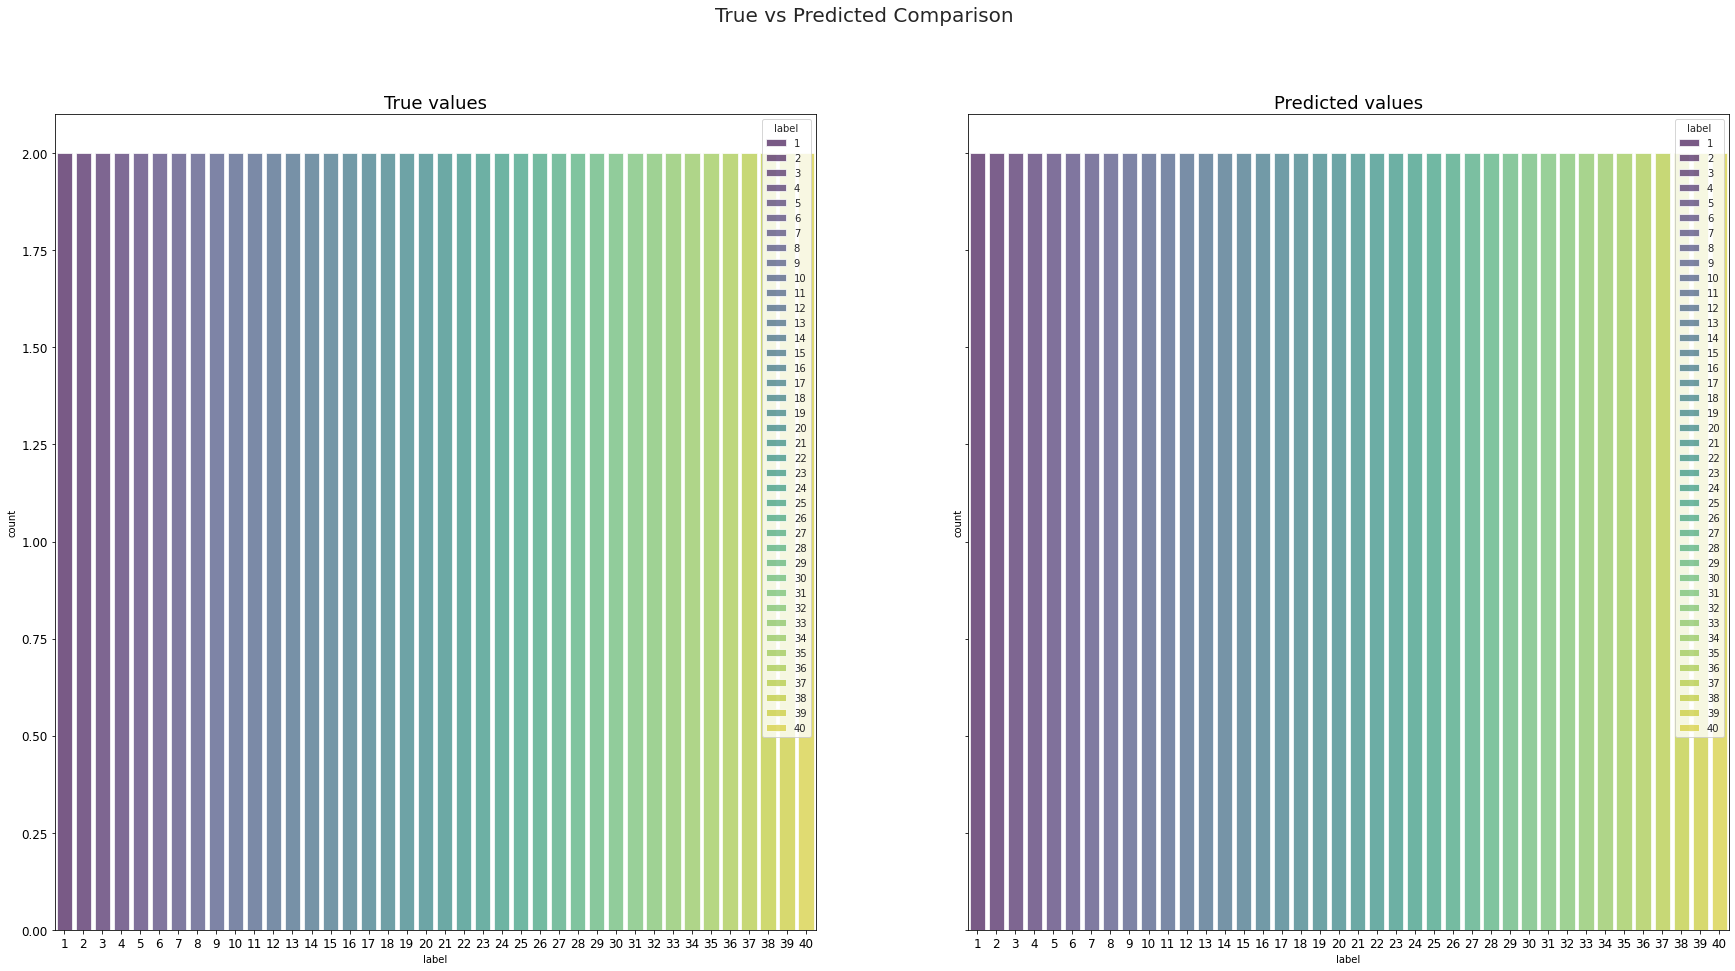

In [60]:
nbc.visualize(y_test, prediction, 'label')